<a href="https://colab.research.google.com/github/pintophr/Assessing-the-Psychological-Impact-of-Generative-AI-on-Data-Science-Education/blob/main/Assessing_the_Psychological_Impact_of_Generative_AI_on_Data_Science_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Settings
Preparing the programming environment for data analysis.

In [ ]:
# Facilities required for installation.
!pip install factor_analyzer
!pip install pingouin
!pip install rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 39.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=55d5557ef37b88247b29f4b93c615b175aa719c2a4b98d7ed08dec42d67732b2
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.0.0
    Uninstalling platformdirs-4.0.0:
      Successfully un

In [ ]:
# Importing libraries.
import pandas as pd # A powerful data manipulation and analysis tool.
import pingouin as pg # Statistical calculation (based on pandas).
import numpy as np # Linear algebra.
import matplotlib.pyplot as plt # An interface for plotting graphs.
import seaborn as sns # Data visualization (based on matplotlib).
import io # Standard Python library for handling various types of input and output operations.
import rpy2.robjects as robjects # Allows Python to interface with the R language.
import textwrap # Wrapping and formatting plain text.

from matplotlib.colors import ListedColormap # Custom colormap for matplotlib.
from google.colab import files #  A module in Google Colab for handling files.
from scipy.stats import spearmanr # Spearman's correlation.
from factor_analyzer import FactorAnalyzer # EFA.
from factor_analyzer.factor_analyzer import calculate_kmo # KMOs' test.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity # Bartletts' test.
from rpy2.robjects.packages import importr # A function to import R packages.
from rpy2.robjects import pandas2ri # A module to convert between pandas and R data structures.
from rpy2.robjects.vectors import StrVector # A class for handling R's string vectors.

### Interfacing with R from Python code.

In [ ]:
# Load the R magic extension.
%load_ext rpy2.ipython

In [ ]:
%%R

# Packages required for R's environment.
install.packages(c("mlr", "psych", "ineq", "BBmisc", "ddpcr", "xgboost", "MVN", "GPArotation"))

# mlr: machine learning in R.
# psych: designed for multivariate analysis and psychological research.
# ineq: focused on measuring inequality, concentration, and poverty.
# BBmisc: a collection of helper functions for data analysis.
# ddpcr: provides tools for reading, analyzing, and visualizing ddPCR data.
# xgboost: an efficient and scalable implementation of gradient boosting framework.

(as ‘lib’ is unspecified)




















































































































































































































































	‘/tmp/Rtmpf3vZ1q/downloaded_packages’



In [ ]:
%%R

# Loading packages.
library(mlr)
library(psych)
library(ineq)
library(BBmisc)
library(ddpcr)
library(MVN)
library(GPArotation)


Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Attaching package: ‘BBmisc’



    isFALSE


Attaching package: ‘ddpcr’



    %btwn%



    step




 

 

 




Error in library(MVN) : there is no package called ‘MVN’


### Loading CI/UFPB students' dataset.

In [ ]:
# Delete all datasets loaded.
!rm *.csv

# Loading CI/UFPB students' data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['LLMs_dataset(UFPB).csv']), encoding='ISO-8859-1', delimiter=';')

rm: cannot remove '*.csv': No such file or directory


Saving LLMs_dataset(UFPB).csv to LLMs_dataset(UFPB).csv


# 2. Exploratory Analysis
Viewing questionnaires' shape and some descriptive statisctis from dataset.

In [ ]:
# Questionnaires' columns.
pd.DataFrame(df.columns, columns=['Column Name'])

,Column Name
0,Li e compreendi que a qualquer momento posso d...
1,Qual é o seu gênero?
2,Qual é o seu curso?
3,"Em qual categoria você se encontra, aproximada..."
4,"Qual a sua idade, aproximadamente?"
5,Qual seu nível de conhecimento sobre LLMs (Cha...
6,Quais LLMs você utiliza?
7,Sinto que aprendo o que realmente me interessa...
8,"Muitas vezes, fico tão empolgado que perco a n..."
9,"LLMs (ChatGPT, Bard etc.) tornam a programação..."


In [ ]:
# Checking for missing values.
valores_nulos = df.isnull().sum().sum()
print(f'NaNs: {valores_nulos}')

NaNs: 0


Viewing samples' age and gender frequencies.

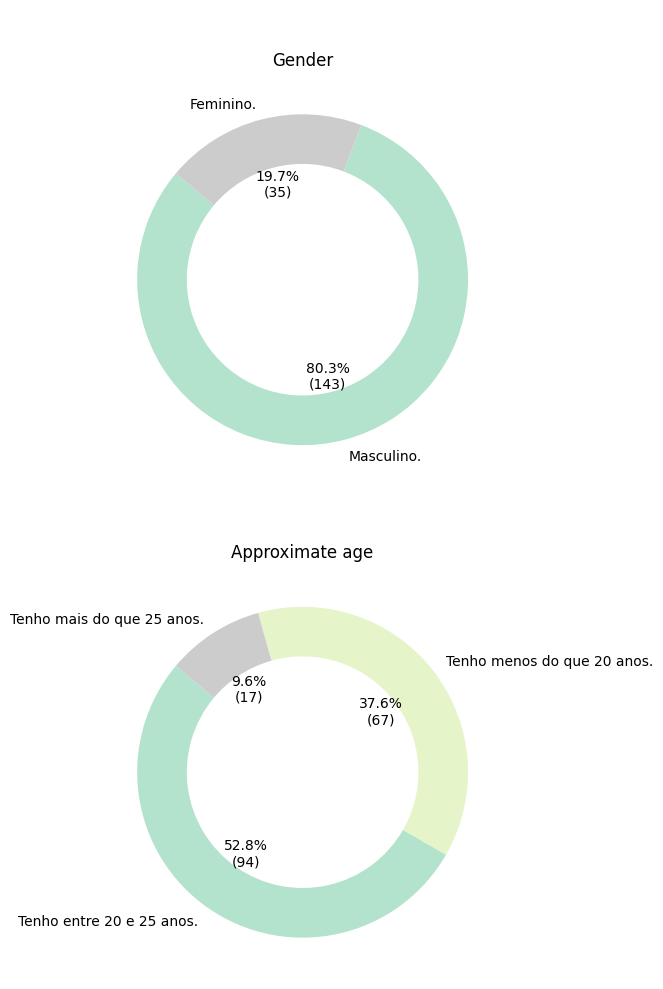

In [ ]:
# Value counts for age and gender.
gender_counts = df["Qual é o seu gênero?"].value_counts()
age_counts = df["Qual a sua idade, aproximadamente?"].value_counts()

# Visual representation.
# Creating the preview window.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))

# Function to display percentage and count on pie chart.
def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Gender Chart.
colors_gender = plt.cm.Pastel2(np.linspace(0, 1, len(gender_counts)))
gender_counts.plot(kind='pie', ax=axes[0], colors=colors_gender, autopct=lambda pct: func(pct, gender_counts), startangle=140, wedgeprops=dict(width=0.3))
axes[0].set_title('\n\nGender')
axes[0].set_ylabel('')

# Age Chart.
colors_age = plt.cm.Pastel2(np.linspace(0, 1, len(age_counts)))
age_counts.plot(kind='pie', ax=axes[1], colors=colors_age, autopct=lambda pct: func(pct, age_counts), startangle=140, wedgeprops=dict(width=0.3))
axes[1].set_title('\n\nApproximate age')
axes[1].set_ylabel('')

# Showing the charts.
plt.tight_layout()
plt.show()

# 3. Psychometric Scales

### Scales adjustments for analysis.

Checking loaded items values.

In [ ]:
# Finding the maximum and minimum value in a sample.
minimum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].min()
maximum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].max()

# Displaying the values found.
print("minimum_value:", minimum_value)
print("maximum value:", maximum_value)

minimum_value: 0
maximum value: 6


Adjusting Linkert Scales from 0-6 to 1-7.

In [ ]:
# It is better to have a true midpoint on the scales for performing descriptive statistics.On dataset, all scales are rated from 0 to 6. So the convertion is needed.
# List of columns (items) you want to adjust.
itens = [
    'Qual seu nível de conhecimento sobre LLMs (ChatGPT, Bard etc.)?',
    'Sinto que aprendo o que realmente me interessa no meu curso.',
    'Muitas vezes, fico tão empolgado que perco a noção do tempo quando estou envolvido em um projeto ou atividade acadêmica.',
    'LLMs (ChatGPT, Bard etc.) tornam a programação mais democrática e acessível para as pessoas.',
    'Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Nunca me sinto capaz de alcançar meus objetivos acadêmicos.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.',
    'Para mim, aprender sobre programação é um interesse pessoal.',
    'Prefiro programar sem ajuda de LLMs (ChatGPT, Bard etc.).',
    'Me divirto quando aprendo e adquiro novos conhecimentos sobre tecnologia.',
    'As demandas do meu curso me deixam emocionalmente cansado(a).',
    'Acredito que LLMs (ChatGPT, Bard etc.) podem ser melhor exploradas pelos professores nas aulas, atividades e/ou provas.',
    'Gosto de ir em todos as aulas do meu curso.',
    'Sinto que tenho as habilidades necessárias para ir bem em provas de programação.',
    'Não tenho interesse em programação competitiva (ICPC, CodeJam etc.).',
    'Penso que LLMs (ChatGPT, Bard etc.) são muito eficientes em programação.',
    'Tento me envolver em atividades extracurriculares do curso para me destacar.',
    'Tenho dificuldade para relaxar depois das aulas.',
    'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.',
    'Me preocupo que programadores sejam substituídos pelos modelos de inteligência artificial.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',
    'Sou pressionado pelas demandas do curso.',
    'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).',
    'Fico esgotado quando tenho que ir à universidade.',
    'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).',
    'Deixo para estudar para as provas de última hora.',
    'Tenho medo que modelos de inteligência artificial tornem conteúdos que aprendi na faculdade obsoletos.',
    'Tento ir bem nas provas para agradar meus professores.',
    'Utilizo LLMs (ChatGPT, Bard etc.) para planejar meus estudos em programação.',
    'Sinto como se não pudesse acompanhar as mudanças causadas pelos modelos de inteligência artificial.',
    'Sinto tremores ou inquietações no corpo, como nas mãos ou nas pernas.'
]

# Add 1 to each item.
for item in itens:
    df[item] = df[item] + 1

# Finding the maximum and minimum value in a sample again.
minimum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].min()
maximum_value = df['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.'].max()

# Displaying the values found.
print("minimum_value:", minimum_value)
print("maximum value:", maximum_value)

minimum_value: 1
maximum value: 7


Inverted items treatment.

In [ ]:
# Adjusting indexes of inverted items.
item_to_invert = 'Não tenho interesse em programação competitiva (ICPC, CodeJam etc.).'
item_to_invert2 = 'Prefiro programar sem ajuda de LLMs (ChatGPT, Bard etc.).'
df[item_to_invert] = 8 - df[item_to_invert]
df[item_to_invert2] = 8 - df[item_to_invert2]

### Preparing scales' dataframes.

In [ ]:
# Let’s group the items of the scales in separate dataframes.
# Dividing items (columns) into lists that correspond to psychometric scales.
scale_academic_burnout = ['Nunca me sinto capaz de alcançar meus objetivos acadêmicos.', 'Tenho dificuldade para relaxar depois das aulas.', 'Fico esgotado quando tenho que ir à universidade.', 'As demandas do meu curso me deixam emocionalmente cansado(a).']
scale_technology_anxiety = ['Sinto como se não pudesse acompanhar as mudanças causadas pelos modelos de inteligência artificial.',  'Me preocupo que programadores sejam substituídos pelos modelos de inteligência artificial.',  'Tenho medo que modelos de inteligência artificial tornem conteúdos que aprendi na faculdade obsoletos.']
scale_intrinsic_motivation = ['Gosto de ir em todos as aulas do meu curso.', 'Muitas vezes, fico tão empolgado que perco a noção do tempo quando estou envolvido em um projeto ou atividade acadêmica.', 'Para mim, aprender sobre programação é um interesse pessoal.']
scale_metacognitive_strategies = ['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.', 'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',   'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).']
scale_disfunctional_strategies = ['Deixo para estudar para as provas de última hora.', 'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).', 'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.']
scale_learning_strategies =['Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.', 'Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.',   'Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).', 'Deixo para estudar para as provas de última hora.', 'Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).', 'Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.']
scale_acceptance = ['Prefiro programar sem ajuda de LLMs (ChatGPT, Bard etc.).', 'LLMs (ChatGPT, Bard etc.) tornam a programação mais democrática e acessível para as pessoas.', 'Acredito que LLMs (ChatGPT, Bard etc.) podem ser melhor exploradas pelos professores nas aulas, atividades e/ou provas.', 'Me sinto confiante com os textos e/ou códigos gerados por LLMs (ChatGPT, Bard etc.).', 'Penso que LLMs (ChatGPT, Bard etc.) são muito eficientes em programação.']


# Creating the dataframes of the psychometric scales.
df_scale_academic_burnout = df[scale_academic_burnout]
df_scale_technology_anxiety = df[scale_technology_anxiety]
df_scale_intrinsic_motivation = df[scale_intrinsic_motivation]
df_scale_metacognitive_strategies = df[scale_metacognitive_strategies]
df_scale_disfunctional_strategies = df[scale_disfunctional_strategies]
df_scale_learning_strategies = df[scale_learning_strategies]
df_scale_acceptance = df[scale_acceptance]

In [ ]:
# Loading scales dataframes to Rs' enviroment.
%R -i df_scale_academic_burnout
%R -i df_scale_technology_anxiety
%R -i df_scale_intrinsic_motivation
%R -i df_scale_metacognitive_strategies
%R -i df_scale_disfunctional_strategies
%R -i df_scale_learning_strategies
%R -i df_scale_acceptance

# 4. Psychometric properties validation.

## Factor Forest algorithm settings

Goretzko, D., & Bühner, M. (2020). One model to rule them all? Using machine learning algorithms to determine the number of factors in exploratory factor analysis. Psychological Methods, 25(6), 776–786. https://doi.org/10.1037/met0000262

Factor Forest repository: <https://osf.io/mvrau/>



In [ ]:
# Unpacking Factor Forest scripts.
!unzip /content/Factor_Forest.zip -d /content/Factor_Forest/

Archive:  /content/Factor_Forest.zip
  inflating: /content/Factor_Forest/Analysis Script.R  
   creating: /content/Factor_Forest/__MACOSX/
  inflating: /content/Factor_Forest/__MACOSX/._Analysis Script.R  
  inflating: /content/Factor_Forest/CD_approach.R  
  inflating: /content/Factor_Forest/__MACOSX/._CD_approach.R  
  inflating: /content/Factor_Forest/factor.forest.R  
  inflating: /content/Factor_Forest/__MACOSX/._factor.forest.R  
  inflating: /content/Factor_Forest/OSF_Factor_Forest.Rproj  
  inflating: /content/Factor_Forest/READ_ME  
  inflating: /content/Factor_Forest/__MACOSX/._READ_ME  
  inflating: /content/Factor_Forest/tunedxgb.rds  
  inflating: /content/Factor_Forest/xgb-functions.R  
  inflating: /content/Factor_Forest/__MACOSX/._xgb-functions.R  


In [ ]:
%%R

# Source necessary function scripts
source('/content/Factor_Forest/xgb-functions.R')
source('/content/Factor_Forest/CD_approach.R')
source('/content/Factor_Forest/factor.forest.R')

In [ ]:
%%R

# Load the pre-trained XGBoost model.
xgb <- readRDS(file = "/content/Factor_Forest/tunedxgb.rds")

## Exploratory Factorial Analysis (EFA)

### AI Technology Anxiety (AITA-3)

KMO, Bartllets' test of sphericity and eigenvalues' elbow chart.

KMO Test: 0.562
Bartlett's Test of Sphericity: chi-square=89.575, p-value=2.7e-19


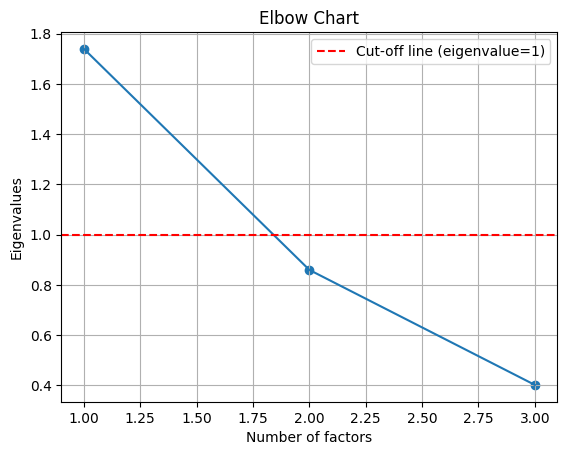

In [ ]:
# Setting data.
data = df_scale_technology_anxiety

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, rotation=None, method='principal')
fa.fit(data)

# Loadings.
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartlett's test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line based on Kaiser criterion.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

Performing parallel analysis.

Parallel analysis suggests that the number of factors =  1  and the number of components =  1 


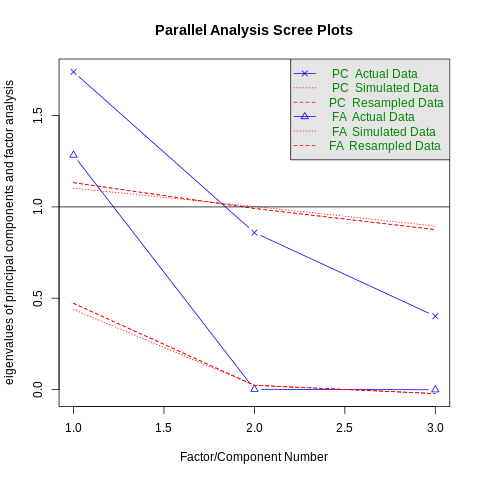

In [ ]:
%%R

# Using the 'fa.parallel' function from the 'psych' package.
fa_parallel <- fa.parallel(df_scale_technology_anxiety, fm="pa", fa="both")

Factor Forest algorithm.

In [ ]:
%%R

# Running the model with your empirical data.
results <- factor.forest(newdata = df_scale_technology_anxiety, mod = xgb)
print(results)

[06:36:11] WARNING: src/learner.cc:1098: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


 Probabilities for different factor solutions: 

   prob.1 prob.2 prob.3 prob.4 prob.5 prob.6 prob.7 prob.8
1 0.99993  5e-05  1e-05  1e-05      0      0      0      0


 Suggested number of factors: 1 

NULL


Deciding the correct number of factors to be extracted in the EFA.

Variance Explained by each factor:
 [1.73957835]
Proportional Variance Explained by each factor:
 [0.57985945]
Cumulative Variance Explained by each factor:
 [0.57985945]


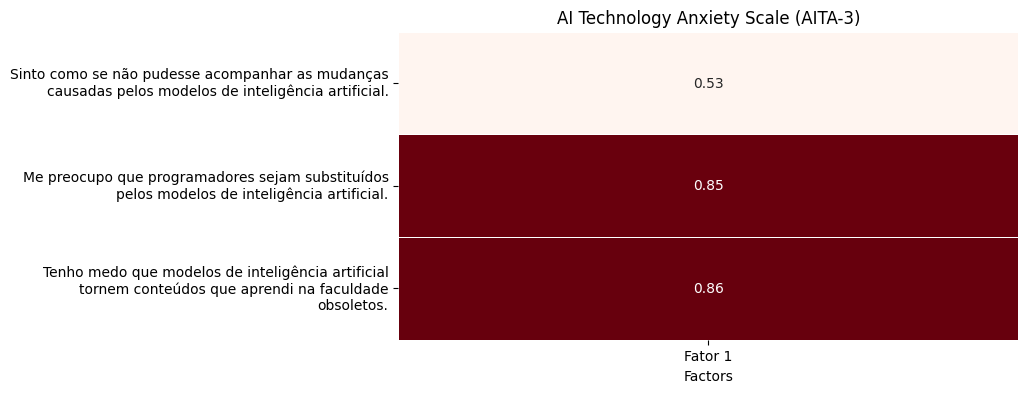

In [ ]:
# Setting the number of factors.
n_factors = 1
data = df_scale_technology_anxiety

fa = FactorAnalyzer(n_factors=n_factors, rotation=None, method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Reds', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('AI Technology Anxiety Scale (AITA-3)')
plt.xlabel('Factors')
plt.show()

Reliability using the omega function.

In [ ]:
%%R

# Assuming df_scale_technology_anxiety is your data frame
omega_results <- omega(df_scale_technology_anxiety, nfactors = 1, fm = "pa")

# Print the results
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

Total Omega:  0.6641438 
Cronbach's Alpha:  0.6194212 


### Academic Burnout Model (ABM-4)



KMO, Bartllets' test of sphericity and eigenvalues' elbow chart.

KMO Test: 0.742
Bartlett's Test of Sphericity: chi-square=114.637, p-value=2.18e-22


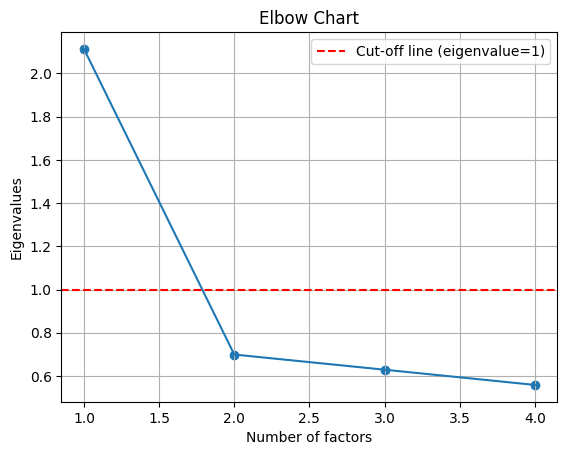

In [ ]:
# Setting data.
data = df_scale_academic_burnout

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, rotation=None, method='principal')
fa.fit(data)

# Loadings.
loadings = abs(fa.loadings_)
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartletts' test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues based on Kaiser criterion.
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

Performing parallel analysis.

Parallel analysis suggests that the number of factors =  1  and the number of components =  1 


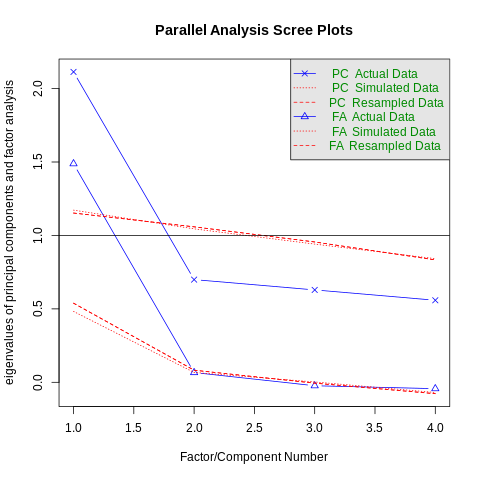

In [ ]:
%%R

# Using the 'fa.parallel' function from the 'psych' package
fa_parallel <- fa.parallel(df_scale_academic_burnout, fm="pa", fa="both")

Factor Forest algorithm.

In [ ]:
# Running the model with your empirical data.
%%R
results <- factor.forest(newdata = df_scale_academic_burnout, mod = xgb)
print(results)



 Probabilities for different factor solutions: 

   prob.1 prob.2 prob.3 prob.4 prob.5 prob.6 prob.7 prob.8
1 0.99997  2e-05      0      0      0      0      0      0


 Suggested number of factors: 1 

NULL


Deciding the correct number of factors to be extracted in the EFA.

Variance Explained by each factor:
 [2.11331634]
Proportional Variance Explained by each factor:
 [0.52832909]
Cumulative Variance Explained by each factor:
 [0.52832909]


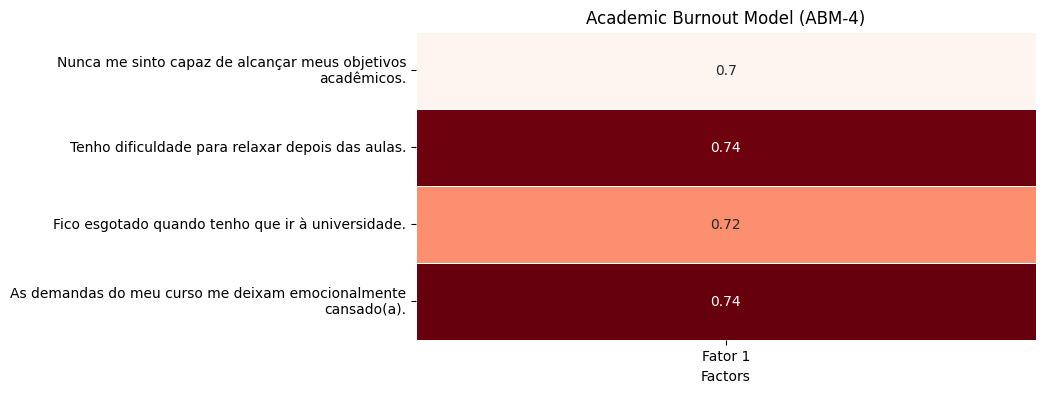

In [ ]:
# Setting the number of factors based on parallel analysis.
n_factors =1
data = df_scale_academic_burnout

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=n_factors, rotation=None, method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Reds', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('Academic Burnout Model (ABM-4)')
plt.xlabel('Factors')
plt.show()

In [ ]:
%%R

# Using the 'omega' function from the 'psych' package.
omega_results <- omega(df_scale_academic_burnout, nfactors = 1, fm = "pa")
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

Total Omega:  0.7027345 
Cronbach's Alpha:  0.7021253 


### Intrisic Motivation Scale (IMOV-3)

KMO, Bartletts' test of sphericity and eigenvalues' elbow chart.

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


KMO Test: 0.581
Bartlett's Test of Sphericity: chi-square=54.667, p-value=8.09e-12


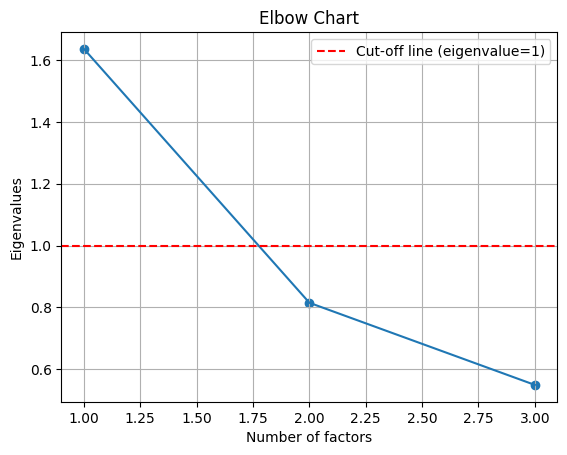

In [ ]:
# Setting data.
data = df_scale_intrinsic_motivation

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, rotation='promax', method='principal')
fa.fit(data)

# Loadings.
loadings = abs(fa.loadings_)
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartletts' test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues based on Kaiser criterion.
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

Performing parallel analysis.

Parallel analysis suggests that the number of factors =  1  and the number of components =  1 


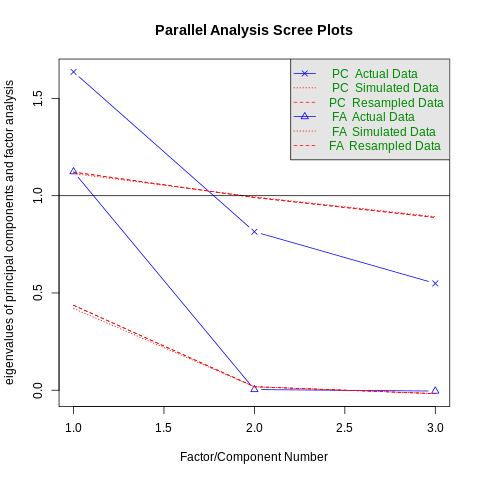

In [ ]:
%%R

# Using the 'fa.parallel' function from the 'psych' package
fa_parallel <- fa.parallel(df_scale_intrinsic_motivation, fm="pa", fa="both")

Factor Forest algorithm.

In [ ]:
%%R

# Running the model with your empirical data.
results <- factor.forest(newdata = df_scale_intrinsic_motivation, mod = xgb)
print(results)



 Probabilities for different factor solutions: 

   prob.1 prob.2 prob.3 prob.4 prob.5 prob.6 prob.7 prob.8
1 0.99998  1e-05      0      0      0      0      0      0


 Suggested number of factors: 1 

NULL


Deciding the correct number of factors to be extracted in the EFA.

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Variance Explained by each factor:
 [1.63620492]
Proportional Variance Explained by each factor:
 [0.54540164]
Cumulative Variance Explained by each factor:
 [0.54540164]


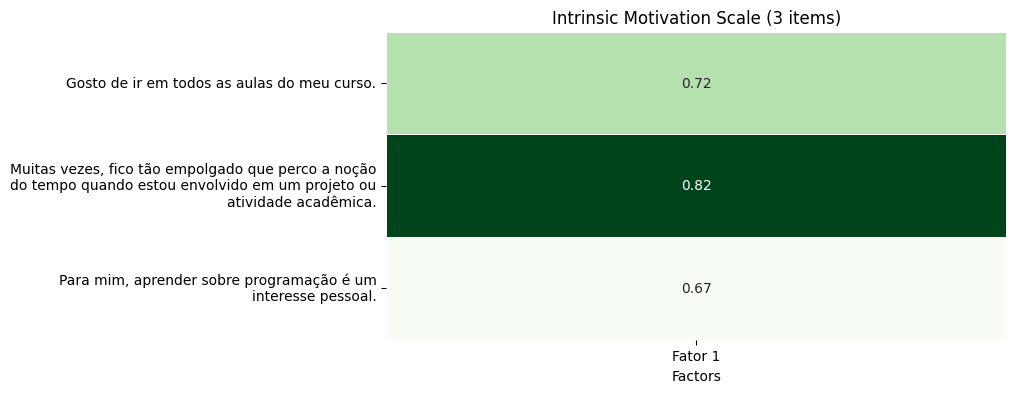

In [ ]:
# Setting the number of factors based on parallel analysis.
n_factors = 1
data = df_scale_intrinsic_motivation

fa = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Greens', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('Intrinsic Motivation Scale (3 items)')
plt.xlabel('Factors')
plt.show()

Total Omega:  0.6255842 
Cronbach's Alpha:  0.5787006 


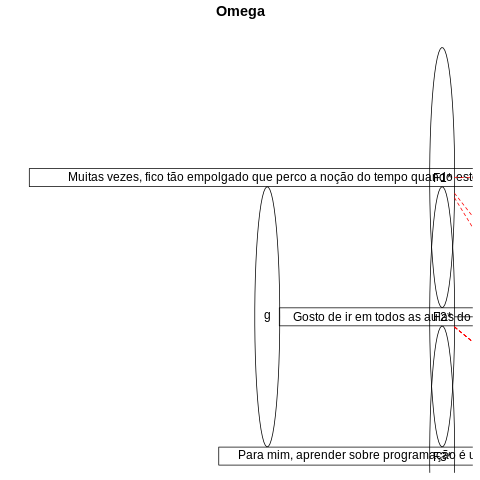

In [ ]:
%%R

# Using the 'omega' function from the 'psych' package.
omega_results <- omega(df_scale_intrinsic_motivation)
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

### LLMs Learning Strategies Scale (LS/LLMs-6)

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


KMO Test: 0.682
Bartlett's Test of Sphericity: chi-square=219.646, p-value=2.1e-38


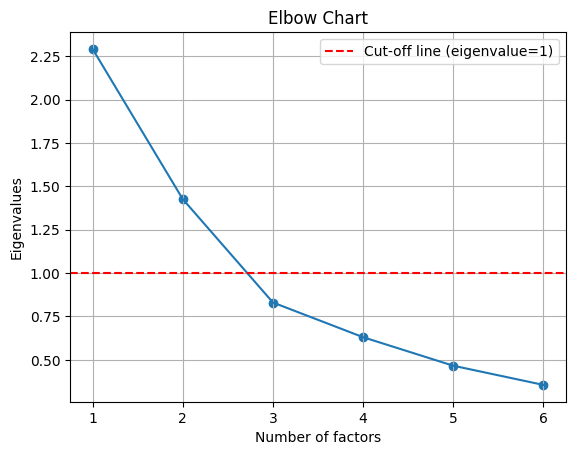

In [ ]:
# Setting data.
data = df_scale_learning_strategies

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, method='principal')
fa.fit(data)

# Loadings.
loadings = abs(fa.loadings_)
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartlett's test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues based on Kaiser criterion.
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

Performing parallel analysis.

Parallel analysis suggests that the number of factors =  2  and the number of components =  2 


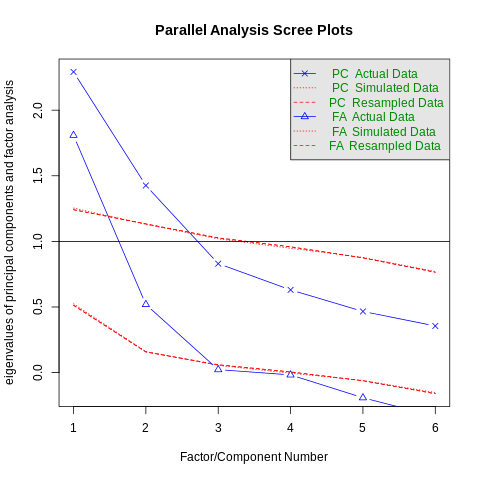

In [ ]:
%%R

# Using the 'fa.parallel' function from the 'psych' package
fa_parallel <- fa.parallel(df_scale_learning_strategies, fm="pa", fa="both")

Factor Forest algortihm

In [ ]:
%%R

# Running the model with your empirical data.
results <- factor.forest(newdata = df_scale_learning_strategies, mod = xgb)
print(results)



 Probabilities for different factor solutions: 

  prob.1  prob.2 prob.3 prob.4 prob.5 prob.6 prob.7 prob.8
1  2e-04 0.99979      0      0      0      0      0      0


 Suggested number of factors: 2 

NULL


Deciding the correct number of factors to be extracted in the EFA.

Variance Explained by each factor:
 [2.16462011 1.54688   ]
Proportional Variance Explained by each factor:
 [0.36077002 0.25781333]
Cumulative Variance Explained by each factor:
 [0.36077002 0.61858335]


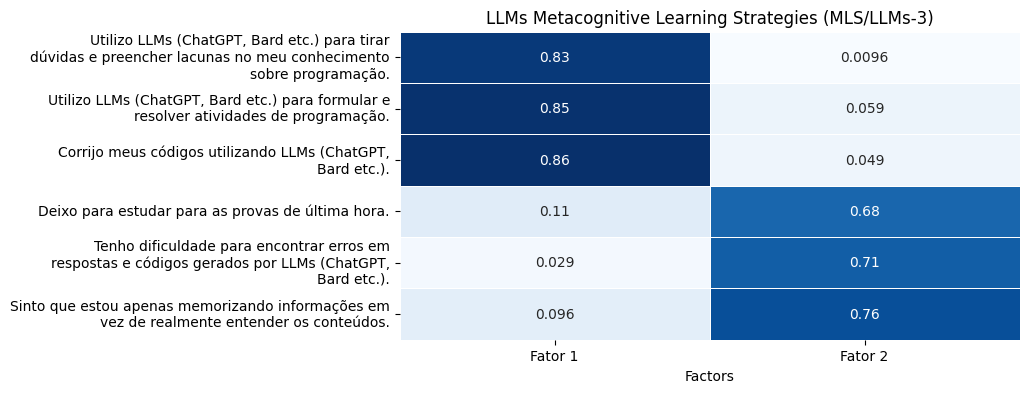

In [ ]:
# Setting the number of factors based on parallel analysis.
n_factors = 2
data = df_scale_learning_strategies

fa = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Blues', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('LLMs Metacognitive Learning Strategies (MLS/LLMs-3)')
plt.xlabel('Factors')
plt.show()

Three factors are required for identification -- general factor loadings are set to be 1 for group factor 2.
Proceed with caution. 
Think about redoing the analysis with alternative values of the 'option' setting.




Total Omega:  0.7391163 
Cronbach's Alpha:  0.6406201 


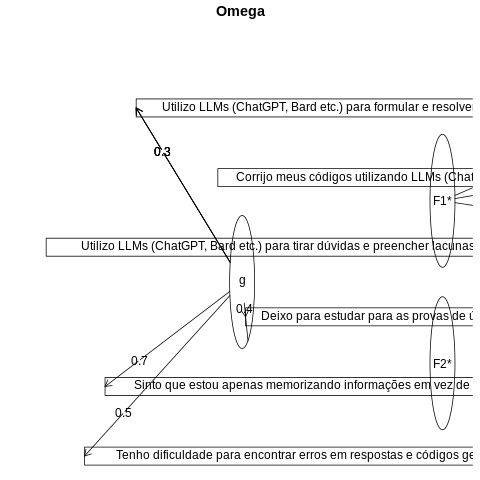

In [ ]:
%%R

# Using the 'omega' function from the 'psych' package.
# The same result was obtained for different 'option' settings.
omega_results <- omega(df_scale_learning_strategies, nfactors = 2, fm = "pa", option = "fa")
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

In [ ]:
%%R

# Just checking the last cells' warning.
efa_results <- fa(df_scale_learning_strategies, nfactors = 2, fm = "pa", rotate = "promax")

# Print the factor loadings
print(efa_results$loadings, cutoff = 0.3)
summary(efa_results)


Loadings:
                                                                                                                PA1   
Utilizo LLMs (ChatGPT, Bard etc.) para tirar dúvidas e preencher lacunas no meu conhecimento sobre programação.  0.705
Utilizo LLMs (ChatGPT, Bard etc.) para formular e resolver atividades de programação.                            0.801
Corrijo meus códigos utilizando LLMs (ChatGPT, Bard etc.).                                                       0.771
Deixo para estudar para as provas de última hora.                                                                     
Tenho dificuldade para encontrar erros em respostas e códigos gerados por LLMs (ChatGPT, Bard etc.).                  
Sinto que estou apenas memorizando informações em vez de realmente entender os conteúdos.                             
                                                                                                                PA2   
Utilizo LLMs (ChatGPT, Bard etc.) par

### LLMs Acceptance Scale (TAME/LLMs-5)

KMO Test: 0.689
Bartlett's Test of Sphericity: chi-square=122.943, p-value=1.28e-21


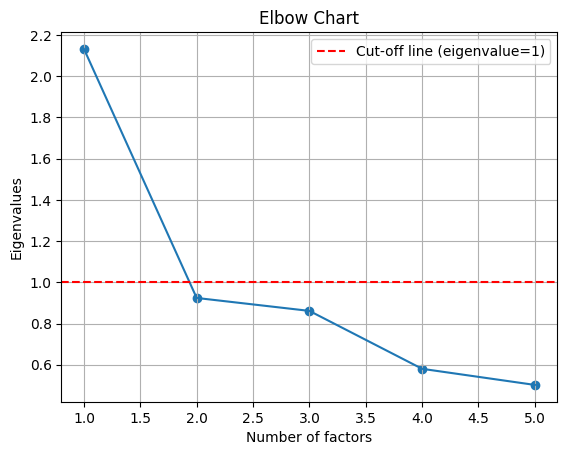

In [ ]:
# Setting data.
data = df_scale_acceptance

# Extracting factors using the Principal Axis Factoring (PAF) method.
fa = FactorAnalyzer(n_factors=1, rotation=None, method='principal')
fa.fit(data)

# Loadings.
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])

# Perform KMO test.
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO Test: {kmo_model:.3f}")

# Perform Bartlett's test of sphericity.
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Bartlett's Test of Sphericity: chi-square={chi_square_value:.3f}, p-value={p_value:.3g}")

# Getting the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()

# Create Elbow Chart.
plt.scatter(range(1,data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)

# Add the cut line based on Kaiser criterion.
plt.axhline(y=1, color='r', linestyle='--', label='Cut-off line (eigenvalue=1)')
plt.legend()

plt.title('Elbow Chart')
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

Performing parallel analysis

Parallel analysis suggests that the number of factors =  2  and the number of components =  1 


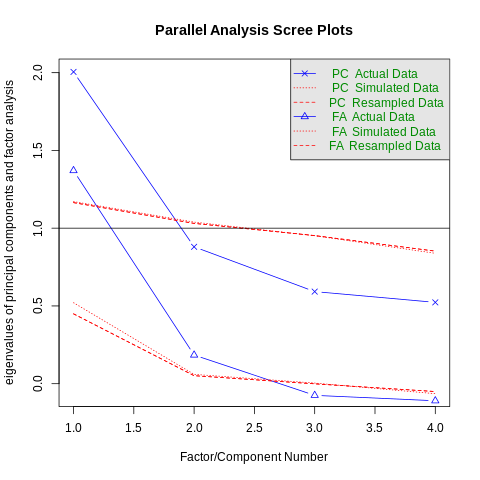

In [ ]:
%%R

# Using the 'fa.parallel' function from the 'psych' package
fa_parallel <- fa.parallel(df_scale_acceptance, fm="pa", fa="both")

Factor Forest algorithm.

In [ ]:
%%R

# Running the model with your empirical data.
results <- factor.forest(newdata = df_scale_acceptance, mod = xgb)
print(results)



 Probabilities for different factor solutions: 

   prob.1  prob.2 prob.3 prob.4 prob.5 prob.6 prob.7 prob.8
1 0.99085 0.00898  6e-05  4e-05  2e-05  2e-05  1e-05  1e-05


 Suggested number of factors: 1 

NULL


Deciding the correct number of factors to be extracted in EFA.

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


Variance Explained by each factor:
 [2.13246707]
Proportional Variance Explained by each factor:
 [0.42649341]
Cumulative Variance Explained by each factor:
 [0.42649341]


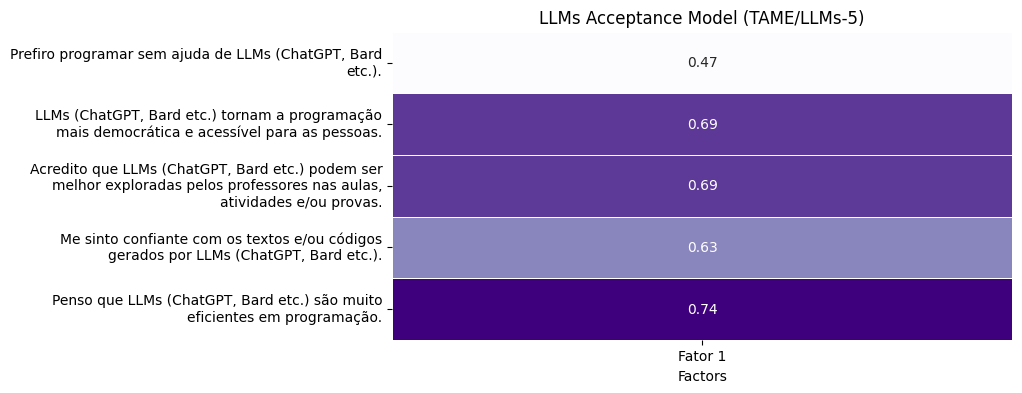

In [ ]:
# Setting the number of factors based on Elbow Chart.
n_factors = 1
data = df_scale_acceptance

fa = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='principal')
fa.fit(data)
loadings = abs(fa.loadings_)

# Variance explained by each factor.
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()
print("Variance Explained by each factor:\n", variance)
print("Proportional Variance Explained by each factor:\n", proportional_variance)
print("Cumulative Variance Explained by each factor:\n", cumulative_variance)

# Creating a heatmap of the loadings of the items with labels and adjusted cell height.
item_names = data.columns
plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap='Purples', linewidths=0.5,
            yticklabels=[textwrap.fill(item, 50) for item in item_names],
            xticklabels=[f'Fator {i+1}' for i in range(n_factors)], cbar=False)
plt.title('LLMs Acceptance Model (TAME/LLMs-5)')
plt.xlabel('Factors')
plt.show()

In [ ]:
%%R

# Using the 'omega' function from the 'psych' package.
omega_results <- omega(df_scale_acceptance,  nfactors = 1, fm = "pa")
cat("Total Omega: ", omega_results$omega.tot, "\n")
cat("Cronbach's Alpha: ", omega_results$alpha, "\n")

Total Omega:  0.6637984 
Cronbach's Alpha:  0.6561179 


# 5. Scales Descriptive Statistics

Adding the sum of scales to the dataframe.

In [ ]:
# List with the names of scales.
scales_names = ['scale_acceptance', 'scale_disfunctional_strategies', 'scale_academic_burnout', 'scale_technology_anxiety', 'scale_intrinsic_motivation',  'scale_metacognitive_strategies']

# Sum of the scales.
for scale in scales_names:
    df['Sum_' + scale] = globals()[f'df_{scale}'].sum(axis=1)

Generating Box and Violin plots for each scale.

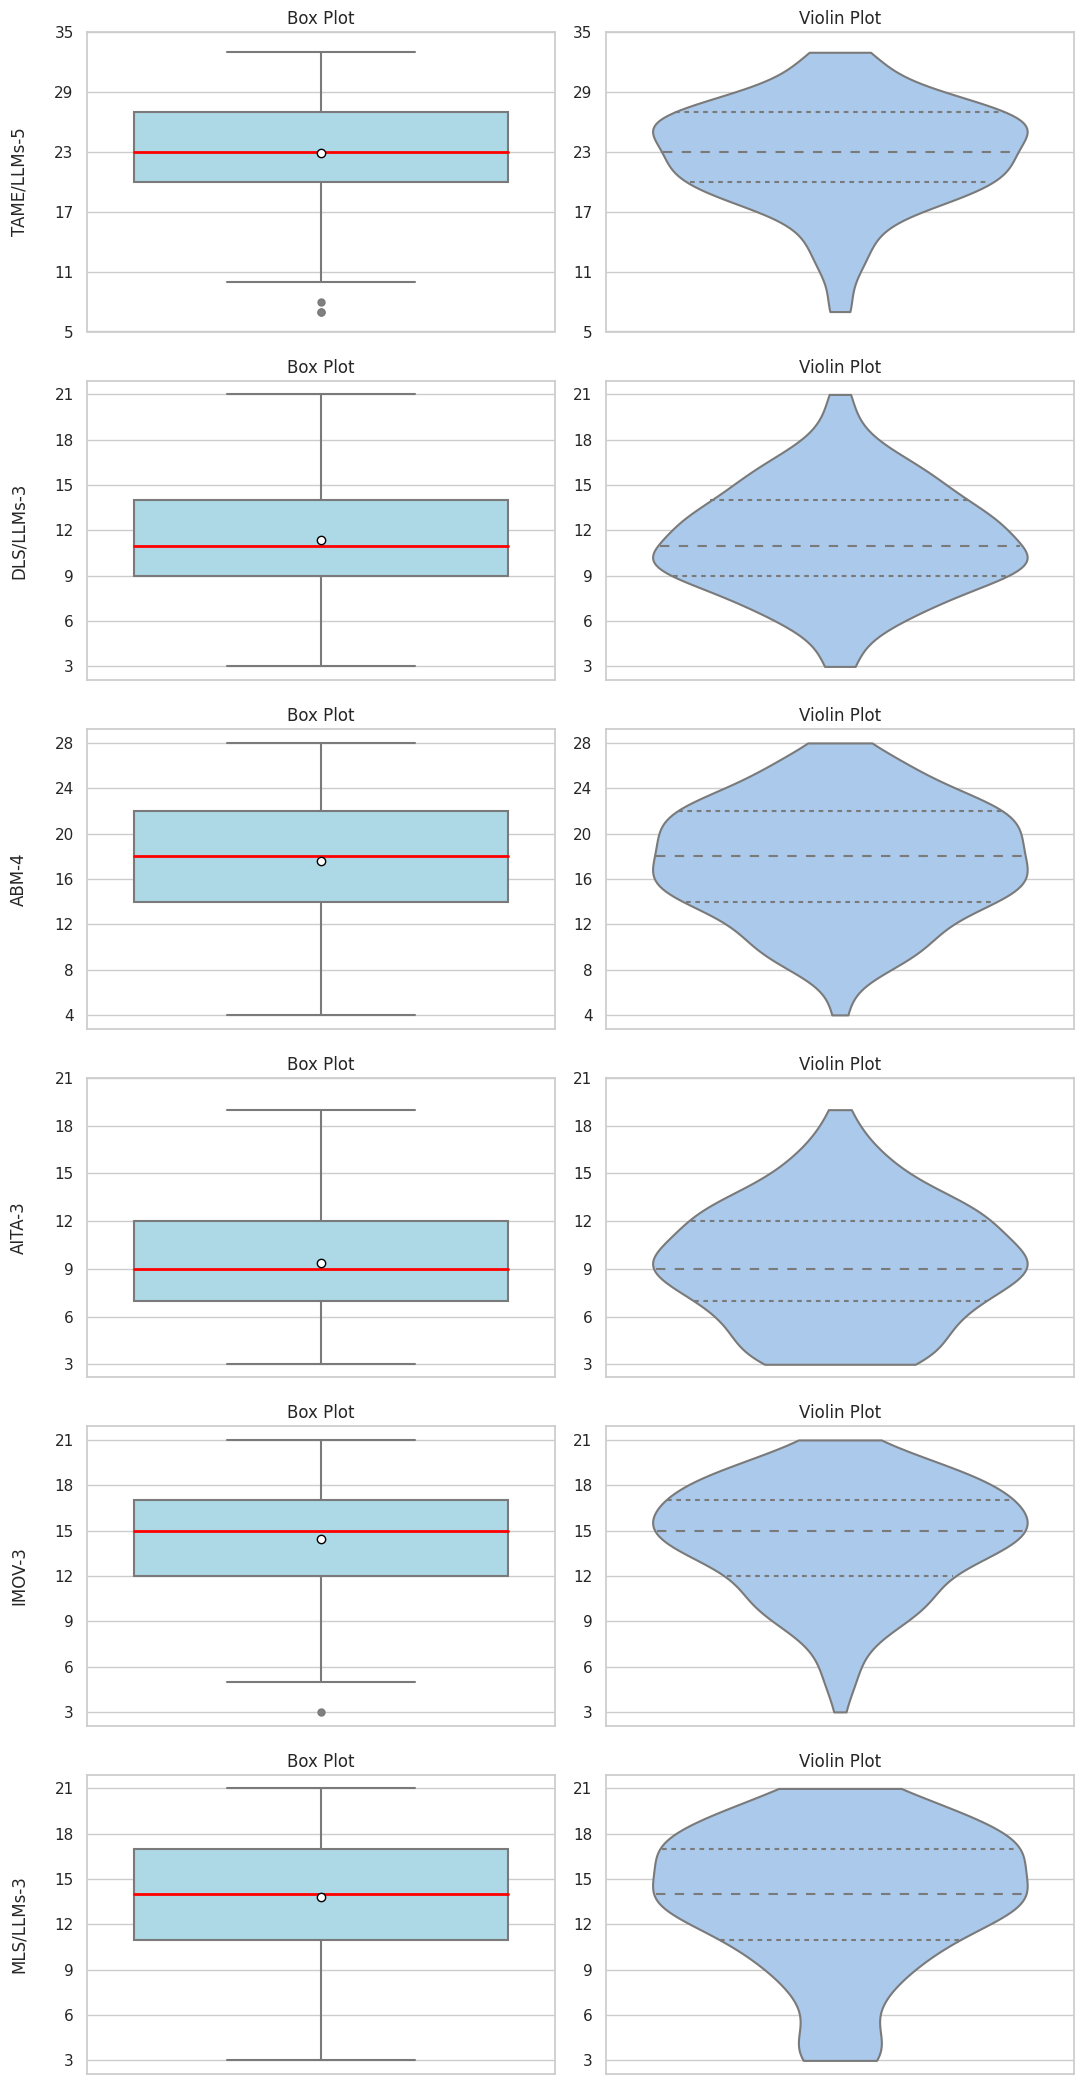

In [ ]:
# Initial Seaborn settings.
sns.set_style("whitegrid")
sns.set_context("notebook")

# Dictionary containing descriptions for the scales.
nomes_descritivos = {
    'scale_acceptance': 'TAME/LLMs-5\n',
    'scale_disfunctional_strategies': 'DLS/LLMs-3\n',
    'scale_metacognitive_strategies': 'MLS/LLMs-3\n',
    'scale_academic_burnout': 'ABM-4\n',
    'scale_technology_anxiety': 'AITA-3\n',
    'scale_intrinsic_motivation': 'IMOV-3\n',
}

# Dictionary containing the number of items in each scale.
num_items = {
    "scale_acceptance": 5,
    "scale_disfunctional_strategies": 3,
    "scale_academic_burnout": 4,
    "scale_technology_anxiety": 3,
    "scale_intrinsic_motivation": 3,
    "scale_metacognitive_strategies": 3
}

# Properties for outliers in box plots.
flierprops = {
    'marker': 'o',
    'markerfacecolor': 'gray',
    'color': 'none',
    'markersize': 5
}

# Creating the figure and subplots for the box plots and violin plots.
fig, axes = plt.subplots(len(scales_names), 2, figsize=(11, 3.5 * len(scales_names)))

# Looping through each scale to plot.
for i, escala in enumerate(scales_names):

    # Creating the box plot on the left.
    box_plot = sns.boxplot(y=df[f"Sum_{escala}"], palette="pastel", showmeans=True,
                           meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
                           boxprops=dict(facecolor='lightblue'),
                           flierprops=flierprops, ax=axes[i, 0])

    # Adjusting the median line to be red.
    box_plot.lines[4].set(color='red', linewidth=2)

    # Setting title and y-label.
    axes[i, 0].set_title('Box Plot')
    axes[i, 0].set_ylabel(nomes_descritivos[escala])

    # Adjusting the y-axis ticks to account for the range of each item and the total number of items.
    max_val = num_items[escala] * 7
    min_val = num_items[escala]  # minimum value
    interval = (max_val - min_val) // 5  # creating intervals for better visualization
    axes[i, 0].set_yticks(list(range(min_val, max_val + 1, interval)))

    # Creating the violin plot on the right.
    violin_plot = sns.violinplot(y=df[f"Sum_{escala}"], inner="quartile", palette="pastel", cut=0, ax=axes[i, 1])
    axes[i, 1].set_title('Violin Plot')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_yticks(list(range(min_val, max_val + 1, interval)))


# Adjusting the layout.
plt.tight_layout()
plt.show()


# 6. Correlations (Spearman)

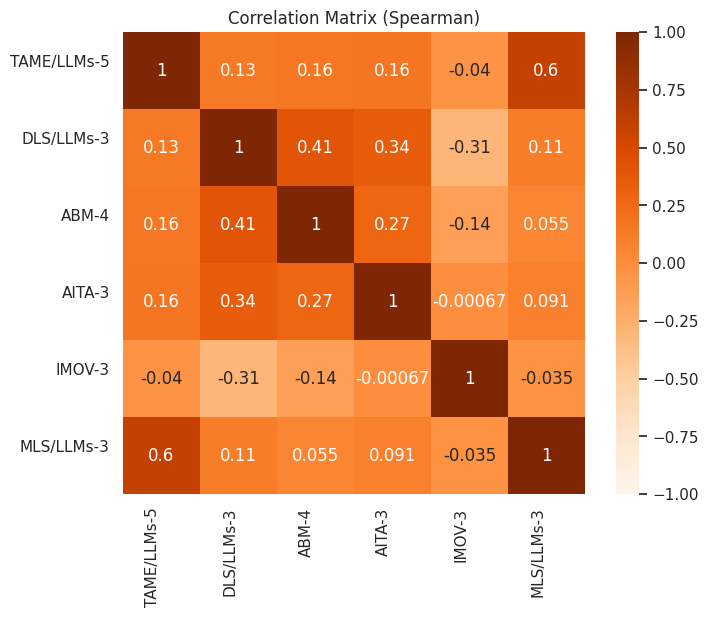

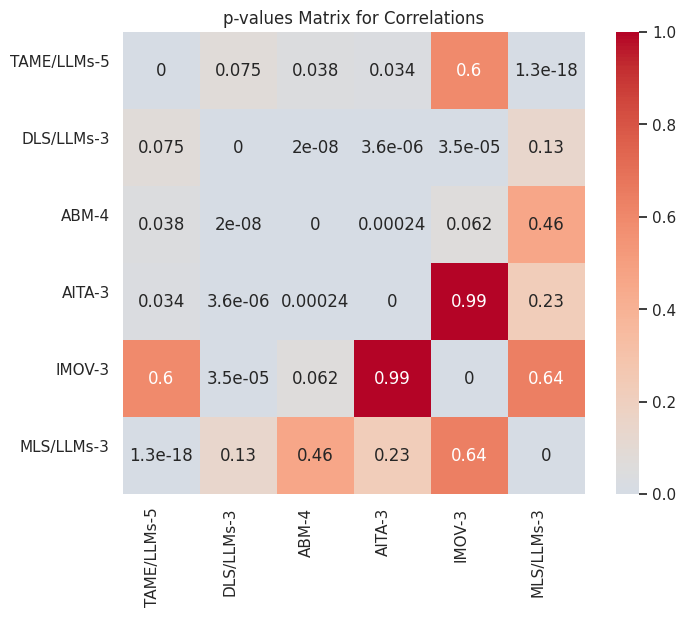

In [ ]:
# Now let’s do a Spearman test for categorical data correlation.
# List to store results.
correlations = []
p_values = []

# Correlations and p-values for each pair of scales.
for col_a in [f'Sum_{nome}' for nome in scales_names]:
    temp_corr = []
    temp_p = []
    for col_b in [f'Sum_{nome}' for nome in scales_names]:
        corr, p = spearmanr(df[col_a], df[col_b])
        temp_corr.append(corr)
        temp_p.append(p)
    correlations.append(temp_corr)
    p_values.append(temp_p)

# Converting results to DataFrames.
correlation_df = pd.DataFrame(correlations, columns=[f'Sum_{nome}' for nome in scales_names], index=[f'Sum_{nome}' for nome in scales_names])
p_values_df = pd.DataFrame(p_values, columns=[f'Sum_{nome}' for nome in scales_names], index=[f'Sum_{nome}' for nome in scales_names])

# Replacing original scale names with descriptive names.
correlation_df.columns = [nomes_descritivos[col.replace("Sum_", "")] for col in correlation_df.columns]
correlation_df.index = [nomes_descritivos[col.replace("Sum_", "")] for col in correlation_df.index]

p_values_df.columns = [nomes_descritivos[col.replace("Sum_", "")] for col in p_values_df.columns]
p_values_df.index = [nomes_descritivos[col.replace("Sum_", "")] for col in p_values_df.index]

# Visualizing the matrix of correlation.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='Oranges', vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation Matrix (Spearman)')
plt.show()

# Visualizing the matrix of p-values.
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, center=0.05, square=True)
plt.title('p-values Matrix for Correlations')
plt.show()